In [2]:
#!pip uninstall opencv-python
#!pip install opencv-python
#!pip install opencv-python
#!pip install numpy --upgrade
#!pip install --upgrade numpy opencv-python
!pip install matplotlib
!pip install tensorflow keras opencv-python matplotlib

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Paths
RAW_DIR = "/mnt/d/BR35H"  # Update to match your dataset path
OUTPUT_DIR = "D:/BR35H/preprocess"
os.makedirs(OUTPUT_DIR, exist_ok=True)

IMG_SIZE = 224  # Resize for consistency

# Function to apply adaptive thresholding
def adaptive_threshold(image_gray):
    return cv2.adaptiveThreshold(
        image_gray,
        maxValue=255,
        adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        thresholdType=cv2.THRESH_BINARY,
        blockSize=11,
        C=2
    )

# Process all images and apply adaptive thresholding
for label in ['yes', 'no']:
    class_dir = os.path.join(RAW_DIR, label)
    save_dir = os.path.join(OUTPUT_DIR, label)
    os.makedirs(save_dir, exist_ok=True)

    for fname in os.listdir(class_dir):
        if not fname.lower().endswith(('.jpg', '.png', '.jpeg')):
            continue

        img_path = os.path.join(class_dir, fname)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is None:
            print(f"⚠️ Skipping unreadable image: {img_path}")
            continue

        # Resize and threshold
        img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img_thresh = adaptive_threshold(img_resized)

        # Save the result
        save_path = os.path.join(save_dir, fname)
        cv2.imwrite(save_path, img_thresh)
        print(f"✅ Processed and saved: {save_path}")


✅ Processed and saved: D:/BR35H/preprocess/yes/y0.jpg
✅ Processed and saved: D:/BR35H/preprocess/yes/y1.jpg
✅ Processed and saved: D:/BR35H/preprocess/yes/y10.jpg
✅ Processed and saved: D:/BR35H/preprocess/yes/y100.jpg
✅ Processed and saved: D:/BR35H/preprocess/yes/y1000.jpg
✅ Processed and saved: D:/BR35H/preprocess/yes/y1001.jpg
✅ Processed and saved: D:/BR35H/preprocess/yes/y1002.jpg
✅ Processed and saved: D:/BR35H/preprocess/yes/y1003.jpg
✅ Processed and saved: D:/BR35H/preprocess/yes/y1004.jpg
✅ Processed and saved: D:/BR35H/preprocess/yes/y1005.jpg
✅ Processed and saved: D:/BR35H/preprocess/yes/y1006.jpg
✅ Processed and saved: D:/BR35H/preprocess/yes/y1007.jpg
✅ Processed and saved: D:/BR35H/preprocess/yes/y1008.jpg
✅ Processed and saved: D:/BR35H/preprocess/yes/y1009.jpg
✅ Processed and saved: D:/BR35H/preprocess/yes/y101.jpg
✅ Processed and saved: D:/BR35H/preprocess/yes/y1010.jpg
✅ Processed and saved: D:/BR35H/preprocess/yes/y1011.jpg
✅ Processed and saved: D:/BR35H/preproces

In [3]:
import os
import cv2

# Constants
IMG_SIZE = 224  # Target image size
INPUT_DIR = "D:/BR35H/preprocess"  # Your input directory with 'yes' and 'no' folders
OUTPUT_DIR = "D:/BR35H/preprocess/resize"  # Output directory to save resized images

# Create output directories
for label in ['yes', 'no']:
    os.makedirs(os.path.join(OUTPUT_DIR, label), exist_ok=True)

# Resize images and save
for label in ['yes', 'no']:
    input_class_dir = os.path.join(INPUT_DIR, label)
    output_class_dir = os.path.join(OUTPUT_DIR, label)

    for fname in os.listdir(input_class_dir):
        if not fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        input_path = os.path.join(input_class_dir, fname)
        output_path = os.path.join(output_class_dir, fname)

        img = cv2.imread(input_path)
        if img is None:
            print(f"⚠️ Failed to read {input_path}")
            continue

        resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        cv2.imwrite(output_path, resized)
        print(f"✅ Resized and saved: {output_path}")


✅ Resized and saved: D:/BR35H/preprocess/resize/yes/y0.jpg
✅ Resized and saved: D:/BR35H/preprocess/resize/yes/y1.jpg
✅ Resized and saved: D:/BR35H/preprocess/resize/yes/y10.jpg
✅ Resized and saved: D:/BR35H/preprocess/resize/yes/y100.jpg
✅ Resized and saved: D:/BR35H/preprocess/resize/yes/y1000.jpg
✅ Resized and saved: D:/BR35H/preprocess/resize/yes/y1001.jpg
✅ Resized and saved: D:/BR35H/preprocess/resize/yes/y1002.jpg
✅ Resized and saved: D:/BR35H/preprocess/resize/yes/y1003.jpg
✅ Resized and saved: D:/BR35H/preprocess/resize/yes/y1004.jpg
✅ Resized and saved: D:/BR35H/preprocess/resize/yes/y1005.jpg
✅ Resized and saved: D:/BR35H/preprocess/resize/yes/y1006.jpg
✅ Resized and saved: D:/BR35H/preprocess/resize/yes/y1007.jpg
✅ Resized and saved: D:/BR35H/preprocess/resize/yes/y1008.jpg
✅ Resized and saved: D:/BR35H/preprocess/resize/yes/y1009.jpg
✅ Resized and saved: D:/BR35H/preprocess/resize/yes/y101.jpg
✅ Resized and saved: D:/BR35H/preprocess/resize/yes/y1010.jpg
✅ Resized and save

In [4]:
import os
import cv2
import numpy as np

# Paths
INPUT_DIR = "/mnt/d/BR35H/preprocess//resize"  # Input resized images 
OUTPUT_DIR = "D:/BR35H/preprocess/augmented"  # Output folder to save augmented images
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Augmentation parameters
ROTATION_ANGLE = 15  # degrees
IMG_SIZE = 224

# Create output class directories
for label in ['yes', 'no']:
    os.makedirs(os.path.join(OUTPUT_DIR, label), exist_ok=True)

# Augmentation function
def augment_image(img):
    h, w = img.shape[:2]
    center = (w // 2, h // 2)

    # Rotate +15
    M1 = cv2.getRotationMatrix2D(center, ROTATION_ANGLE, 1.0)
    rotated1 = cv2.warpAffine(img, M1, (w, h), borderMode=cv2.BORDER_REFLECT)

    # Rotate -15
    M2 = cv2.getRotationMatrix2D(center, -ROTATION_ANGLE, 1.0)
    rotated2 = cv2.warpAffine(img, M2, (w, h), borderMode=cv2.BORDER_REFLECT)

    # Horizontal flip
    hflip = cv2.flip(img, 1)

    # Vertical flip
    vflip = cv2.flip(img, 0)

    return [rotated1, rotated2, hflip, vflip]

# Apply augmentation
for label in ['yes', 'no']:
    class_dir = os.path.join(INPUT_DIR, label)
    output_class_dir = os.path.join(OUTPUT_DIR, label)

    for fname in os.listdir(class_dir):
        if not fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        img_path = os.path.join(class_dir, fname)
        img = cv2.imread(img_path)
        if img is None:
            print(f"⚠️ Could not read image: {img_path}")
            continue

        # Save original
        base_name = os.path.splitext(fname)[0]
        cv2.imwrite(os.path.join(output_class_dir, f"{base_name}_orig.jpg"), img)

        # Save augmented versions
        aug_imgs = augment_image(img)
        aug_names = ['rot1', 'rot2', 'hflip', 'vflip']

        for aug, name in zip(aug_imgs, aug_names):
            aug_fname = f"{base_name}_{name}.jpg"
            cv2.imwrite(os.path.join(output_class_dir, aug_fname), aug)

        print(f"✅ Augmented {label}/{fname}")


✅ Augmented yes/y0.jpg
✅ Augmented yes/y1.jpg
✅ Augmented yes/y10.jpg
✅ Augmented yes/y100.jpg
✅ Augmented yes/y1000.jpg
✅ Augmented yes/y1001.jpg
✅ Augmented yes/y1002.jpg
✅ Augmented yes/y1003.jpg
✅ Augmented yes/y1004.jpg
✅ Augmented yes/y1005.jpg
✅ Augmented yes/y1006.jpg
✅ Augmented yes/y1007.jpg
✅ Augmented yes/y1008.jpg
✅ Augmented yes/y1009.jpg
✅ Augmented yes/y101.jpg
✅ Augmented yes/y1010.jpg
✅ Augmented yes/y1011.jpg
✅ Augmented yes/y1012.jpg
✅ Augmented yes/y1013.jpg
✅ Augmented yes/y1014.jpg
✅ Augmented yes/y1015.jpg
✅ Augmented yes/y1016.jpg
✅ Augmented yes/y1017.jpg
✅ Augmented yes/y1018.jpg
✅ Augmented yes/y1019.jpg
✅ Augmented yes/y102.jpg
✅ Augmented yes/y1020.jpg
✅ Augmented yes/y1021.jpg
✅ Augmented yes/y1022.jpg
✅ Augmented yes/y1023.jpg
✅ Augmented yes/y1024.jpg
✅ Augmented yes/y1025.jpg
✅ Augmented yes/y1026.jpg
✅ Augmented yes/y1027.jpg
✅ Augmented yes/y1028.jpg
✅ Augmented yes/y1029.jpg
✅ Augmented yes/y103.jpg
✅ Augmented yes/y1030.jpg
✅ Augmented yes/y1031.jp

In [1]:
import os
import cv2
import numpy as np
import pywt
from scipy.stats import kurtosis, skew

# Directory of resized images
INPUT_DIR = "D:/BR35H/preprocess/augmented"  # should contain 'yes/' and 'no/' subfolders

# Function to compute statistical features from a 2D array
def compute_stats(matrix):
    flat = matrix.flatten()
    stats = [
        np.mean(flat),
        np.std(flat),
        skew(flat),
        kurtosis(flat),
        np.sum(flat**2),  # energy
        -np.sum(flat * np.log2(flat + 1e-10))  # entropy
    ]
    return stats

# Function to apply DWT level 2 and extract stats from each subband
def extract_dwt_stats(image_gray):
    coeffs = pywt.wavedec2(image_gray, 'db1', level=2)
    stats_features = []

    # coeffs[0] = LL2, coeffs[1:] = [(LH2, HL2, HH2), (LH1, HL1, HH1)]
    subbands = [coeffs[0]] + list(coeffs[1][0:]) + list(coeffs[2][0:])
    for band in subbands:
        stats_features.extend(compute_stats(np.array(band)))

    return np.array(stats_features)  # 6 stats × 7 subbands = 42 features

# Extract DWT statistical features from dataset
features = []
labels = []
filenames = []

for label in ['yes', 'no']:
    label_dir = os.path.join(INPUT_DIR, label)
    for fname in os.listdir(label_dir):
        if not fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue
        img_path = os.path.join(label_dir, fname)
        img = cv2.imread(img_path)
        if img is None:
            continue
        gray = cv2.cvtColor(cv2.resize(img, (224, 224)), cv2.COLOR_BGR2GRAY)
        feat = extract_dwt_stats(gray)
        features.append(feat)
        labels.append(1 if label == 'yes' else 0)
        filenames.append(fname)
        print(f"Processed {label}/{fname} - Feature length: {len(feat)}")

features = np.array(features)
labels = np.array(labels)

print(f"✅ Extracted DWT statistical features for {len(features)} images.")
print(f"📐 Feature vector shape: {features.shape}")


/tmp/ipykernel_251829/4012750859.py:19: RuntimeWarning: invalid value encountered in log2
  -np.sum(flat * np.log2(flat + 1e-10))  # entropy


Processed yes/y0_hflip.jpg - Feature length: 42
Processed yes/y0_orig.jpg - Feature length: 42
Processed yes/y0_rot1.jpg - Feature length: 42
Processed yes/y0_rot2.jpg - Feature length: 42
Processed yes/y0_vflip.jpg - Feature length: 42
Processed yes/y1000_hflip.jpg - Feature length: 42
Processed yes/y1000_orig.jpg - Feature length: 42
Processed yes/y1000_rot1.jpg - Feature length: 42
Processed yes/y1000_rot2.jpg - Feature length: 42
Processed yes/y1000_vflip.jpg - Feature length: 42
Processed yes/y1001_hflip.jpg - Feature length: 42
Processed yes/y1001_orig.jpg - Feature length: 42
Processed yes/y1001_rot1.jpg - Feature length: 42
Processed yes/y1001_rot2.jpg - Feature length: 42
Processed yes/y1001_vflip.jpg - Feature length: 42
Processed yes/y1002_hflip.jpg - Feature length: 42
Processed yes/y1002_orig.jpg - Feature length: 42
Processed yes/y1002_rot1.jpg - Feature length: 42
Processed yes/y1002_rot2.jpg - Feature length: 42
Processed yes/y1002_vflip.jpg - Feature length: 42
Process

In [2]:
import numpy as np

# Save features and labels as .npy files
np.save("D:/BR35H/preprocess/augmented/dwt_statistical_features.npy", features)
np.save("D:/BR35H/preprocess/augmented/dwt_labels.npy", labels)

print("✅ Saved DWT statistical features and labels as .npy files.")

✅ Saved DWT statistical features and labels as .npy files.


In [7]:
!python --version

Python 3.12.3


In [8]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [9]:
#pip install opencv-python
#!pip install pandas
!pip install tensorflow

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten

# Constants
IMG_SIZE = 224
INPUT_DIR = '/mnt/d/BR35H/preprocess/augmented/'  # Should contain 'yes' and 'no' subfolders 
OUTPUT_DIR = 'D:/BR35H/preprocess/augmented/resnet50'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Setup ResNet-50 model (without top classification layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
flattened_output = Flatten()(base_model.output)
resnet_model = Model(inputs=base_model.input, outputs=flattened_output)

# Feature extraction function
def extract_resnet_features(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Failed to read image: {image_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE))
    x = np.expand_dims(img_resized, axis=0)
    x = preprocess_input(x.astype(np.float32))
    features = resnet_model.predict(x, verbose=0)
    return features.flatten()

# Extract features from all images
features = []
labels = []
filenames = []

for label in ['yes', 'no']:
    label_path = os.path.join(INPUT_DIR, label)
    for fname in os.listdir(label_path):
        if not fname.lower().endswith(('.jpg', '.png', '.jpeg')):
            continue
        full_path = os.path.join(label_path, fname)
        try:
            feat = extract_resnet_features(full_path)
            features.append(feat)
            labels.append(1 if label == 'yes' else 0)
            filenames.append(fname)
            print(f"✅ Processed {label}/{fname} — Feature shape: {feat.shape}")
        except Exception as e:
            print(f"❌ Skipping {fname}: {e}")

# Convert to numpy arrays and save
features_array = np.array(features)
labels_array = np.array(labels)

np.save(os.path.join(OUTPUT_DIR, "resnet50_features.npy"), features_array)
np.save(os.path.join(OUTPUT_DIR, "resnet50_labels.npy"), labels_array)

pd.DataFrame({
    "filename": filenames,
    "label": labels_array
}).to_csv(os.path.join(OUTPUT_DIR, "resnet50_labels.csv"), index=False)

print("✅ Saved ResNet-50 features and labels.")

2025-07-16 14:03:09.226076: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-16 14:03:09.425281: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-16 14:03:09.602215: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752674589.754481     481 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752674589.793654     481 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752674590.084284     481 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

✅ Processed yes/y0_hflip.jpg — Feature shape: (100352,)
✅ Processed yes/y0_orig.jpg — Feature shape: (100352,)
✅ Processed yes/y0_rot1.jpg — Feature shape: (100352,)
✅ Processed yes/y0_rot2.jpg — Feature shape: (100352,)
✅ Processed yes/y0_vflip.jpg — Feature shape: (100352,)
✅ Processed yes/y1000_hflip.jpg — Feature shape: (100352,)
✅ Processed yes/y1000_orig.jpg — Feature shape: (100352,)
✅ Processed yes/y1000_rot1.jpg — Feature shape: (100352,)
✅ Processed yes/y1000_rot2.jpg — Feature shape: (100352,)
✅ Processed yes/y1000_vflip.jpg — Feature shape: (100352,)
✅ Processed yes/y1001_hflip.jpg — Feature shape: (100352,)
✅ Processed yes/y1001_orig.jpg — Feature shape: (100352,)
✅ Processed yes/y1001_rot1.jpg — Feature shape: (100352,)
✅ Processed yes/y1001_rot2.jpg — Feature shape: (100352,)
✅ Processed yes/y1001_vflip.jpg — Feature shape: (100352,)
✅ Processed yes/y1002_hflip.jpg — Feature shape: (100352,)
✅ Processed yes/y1002_orig.jpg — Feature shape: (100352,)
✅ Processed yes/y1002_

In [7]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Constants
IMG_SIZE = 224
INPUT_DIR = 'D:/BR35H/preprocess/augmented'  # Contains 'yes' and 'no' subfolders
OUTPUT_DIR = 'D:/BR35H/preprocess/augmented/resnet50_1024'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Configure ResNet-50 with Global Average Pooling and Dense(1024)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
gap_output = GlobalAveragePooling2D()(base_model.output)
dense_output = Dense(1024, activation='relu')(gap_output)  # Reduce from 2048 → 1024
resnet_model = Model(inputs=base_model.input, outputs=dense_output)

# Feature extraction function
def extract_resnet_1024(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Failed to read image: {image_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE))
    x = np.expand_dims(img_resized, axis=0)
    x = preprocess_input(x.astype(np.float32))
    features = resnet_model.predict(x, verbose=0)
    return features.flatten()  # Shape: (1024,)

# Process all images
features, labels, filenames = [], [], []

for label in ['yes', 'no']:
    label_path = os.path.join(INPUT_DIR, label)
    for fname in os.listdir(label_path):
        if not fname.lower().endswith(('.jpg', '.png', '.jpeg')):
            continue
        path = os.path.join(label_path, fname)
        try:
            feat = extract_resnet_1024(path)
            features.append(feat)
            labels.append(1 if label == 'yes' else 0)
            filenames.append(fname)
            print(f"✅ {label}/{fname} — ResNet-50 feature length: {feat.shape[0]}")
        except Exception as e:
            print(f"❌ Error with {fname}: {e}")

# Save features and labels
features_array = np.array(features)
labels_array = np.array(labels)

np.save(os.path.join(OUTPUT_DIR, "resnet50_1024_features.npy"), features_array)
np.save(os.path.join(OUTPUT_DIR, "resnet50_labels.npy"), labels_array)

pd.DataFrame({'filename': filenames, 'label': labels_array}).to_csv(
    os.path.join(OUTPUT_DIR, "resnet50_labels.csv"), index=False
)

print("✅ Saved 1024-dim ResNet-50 features and labels.")

✅ yes/y0_hflip.jpg — ResNet-50 feature length: 1024
✅ yes/y0_orig.jpg — ResNet-50 feature length: 1024
✅ yes/y0_rot1.jpg — ResNet-50 feature length: 1024
✅ yes/y0_rot2.jpg — ResNet-50 feature length: 1024
✅ yes/y0_vflip.jpg — ResNet-50 feature length: 1024
✅ yes/y1000_hflip.jpg — ResNet-50 feature length: 1024
✅ yes/y1000_orig.jpg — ResNet-50 feature length: 1024
✅ yes/y1000_rot1.jpg — ResNet-50 feature length: 1024
✅ yes/y1000_rot2.jpg — ResNet-50 feature length: 1024
✅ yes/y1000_vflip.jpg — ResNet-50 feature length: 1024
✅ yes/y1001_hflip.jpg — ResNet-50 feature length: 1024
✅ yes/y1001_orig.jpg — ResNet-50 feature length: 1024
✅ yes/y1001_rot1.jpg — ResNet-50 feature length: 1024
✅ yes/y1001_rot2.jpg — ResNet-50 feature length: 1024
✅ yes/y1001_vflip.jpg — ResNet-50 feature length: 1024
✅ yes/y1002_hflip.jpg — ResNet-50 feature length: 1024
✅ yes/y1002_orig.jpg — ResNet-50 feature length: 1024
✅ yes/y1002_rot1.jpg — ResNet-50 feature length: 1024
✅ yes/y1002_rot2.jpg — ResNet-50 fea

In [2]:
!pip install PyWavelets

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError('A certificate chain processed, but terminated in a root certificate which is not trusted by the trust provider.'))) - skipping


In [5]:
import os
import cv2
import numpy as np
import pandas as pd
import pywt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# === Configuration ===
IMG_SIZE = 224
INPUT_DIR = '/mnt/d/BR35H/preprocess/augmented'
OUTPUT_DIR = '/mnt/d/BR35H/preprocess/augmented/concatenated_resnet_dwt_1066'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# === Define ResNet-50 base model with 1024-dim output ===
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)       # (None, 2048)
x = Dense(1024, activation='relu')(x) # Reduce to 1024
resnet_model = Model(inputs=base_model.input, outputs=x)

# === DWT Feature Extraction ===
def extract_dwt_flatten(image_gray):
    coeffs = pywt.wavedec2(image_gray, 'bior3.5', level=2, mode='periodization')
    cA2 = coeffs[0]  # Approximation coefficients at level 2
    if np.max(cA2) > 0:
        cA2 = cA2 / np.max(cA2)
    resized = cv2.resize(cA2, (7, 6), interpolation=cv2.INTER_AREA)  # 42 features
    return resized.flatten()

# === ResNet-50 Feature Extraction ===
def extract_resnet_features(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not read image {image_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE))
    x = np.expand_dims(img_resized, axis=0)
    x = preprocess_input(x.astype(np.float32))
    features = resnet_model.predict(x, verbose=0)
    return features.flatten()  # Shape: (1024,)

# === Process Dataset ===
features_list = []
labels_list = []
filenames_list = []

for label in ['yes', 'no']:
    folder_path = os.path.join(INPUT_DIR, label)
    for fname in os.listdir(folder_path):
        if not fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue
        img_path = os.path.join(folder_path, fname)

        img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img_gray is None:
            print(f"⚠️ Could not read: {img_path}")
            continue
        img_gray_resized = cv2.resize(img_gray, (IMG_SIZE, IMG_SIZE))

        dwt_feat = extract_dwt_flatten(img_gray_resized)  # 42 features

        try:
            res_feat = extract_resnet_features(img_path)  # 1024 features
        except Exception as e:
            print(f"❌ ResNet error for {fname}: {e}")
            continue

        fused_feat = np.concatenate([dwt_feat, res_feat])  # 42 + 1024 = 1066
        features_list.append(fused_feat)
        labels_list.append(1 if label == 'yes' else 0)
        filenames_list.append(fname)

        print(f"✅ Processed {label}/{fname} — Feature size: {fused_feat.shape[0]}")

# === Save Features ===
features_array = np.array(features_list)
labels_array = np.array(labels_list)

np.save(os.path.join(OUTPUT_DIR, "resnet50_dwt_fused_1066.npy"), features_array)
np.save(os.path.join(OUTPUT_DIR, "resnet50_dwt_labels.npy"), labels_array)

pd.DataFrame({'filename': filenames_list, 'label': labels_array}).to_csv(
    os.path.join(OUTPUT_DIR, "resnet50_dwt_labels.csv"), index=False
)

print("✅ Saved ResNet-50 (1024) + DWT (42) fused features and labels [Total: 1066 dimensions].")


✅ Processed yes/y0_hflip.jpg — Feature size: 1066
✅ Processed yes/y0_orig.jpg — Feature size: 1066
✅ Processed yes/y0_rot1.jpg — Feature size: 1066
✅ Processed yes/y0_rot2.jpg — Feature size: 1066
✅ Processed yes/y0_vflip.jpg — Feature size: 1066
✅ Processed yes/y1000_hflip.jpg — Feature size: 1066
✅ Processed yes/y1000_orig.jpg — Feature size: 1066
✅ Processed yes/y1000_rot1.jpg — Feature size: 1066
✅ Processed yes/y1000_rot2.jpg — Feature size: 1066
✅ Processed yes/y1000_vflip.jpg — Feature size: 1066
✅ Processed yes/y1001_hflip.jpg — Feature size: 1066
✅ Processed yes/y1001_orig.jpg — Feature size: 1066
✅ Processed yes/y1001_rot1.jpg — Feature size: 1066
✅ Processed yes/y1001_rot2.jpg — Feature size: 1066
✅ Processed yes/y1001_vflip.jpg — Feature size: 1066
✅ Processed yes/y1002_hflip.jpg — Feature size: 1066
✅ Processed yes/y1002_orig.jpg — Feature size: 1066
✅ Processed yes/y1002_rot1.jpg — Feature size: 1066
✅ Processed yes/y1002_rot2.jpg — Feature size: 1066
✅ Processed yes/y100

In [ ]:
import numpy as np
import os
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

# === Paths ===
INPUT_DIR = '/mnt/d/BR35H/preprocess/augmented/concatenated_resnet_dwt_1066'
OUTPUT_DIR = '/mnt/d/BR35H/preprocess/augmented/concatenated'

os.makedirs(OUTPUT_DIR, exist_ok=True)

# === Load Fused Features and Labels ===
feature_path = os.path.join(INPUT_DIR, "resnet50_dwt_fused_1066.npy")
label_path = os.path.join(INPUT_DIR, "resnet50_dwt_labels.npy")

features = np.load(feature_path)
labels = np.load(label_path)

print(f"🔍 Loaded Features: {features.shape}, Labels: {labels.shape}")

# === Normalize before KPCA ===
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# === Apply KPCL (Kernel PCA) ===
kpca = KernelPCA(n_components=100, kernel='rbf', gamma=0.01)  # RBF kernel; tune gamma if needed
features_kpcl = kpca.fit_transform(features_scaled)

print(f"✅ KPCL reduced features to shape: {features_kpcl.shape}")

# === Save Reduced Features ===
np.save(os.path.join(OUTPUT_DIR, "kpcl_features.npy"), features_kpcl)
np.save(os.path.join(OUTPUT_DIR, "labels.npy"), labels)

print("✅ Saved KPCL-reduced features (100D) and labels.")


In [5]:
import os
import cv2
import numpy as np
import pandas as pd
import pywt
import time
from sklearn.decomposition import KernelPCA
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Constants
IMG_SIZE = 224
INPUT_DIR = '/mnt/d/BR35H/preprocess/augmented'
OUTPUT_DIR = '/mnt/d/BR35H/preprocess/augmented/concatenated_resnet_dwt_kpca'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ✅ Load ResNet50 + GAP + Dense(982) → output: 982-D deep feature
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(982, activation='relu')(x)  # 👈 Set to 1024 - 42 = 982
resnet_model = Model(inputs=base_model.input, outputs=x)

# ✅ DWT handcrafted feature extractor (42-D)
def extract_dwt_flatten(image_gray):
    coeffs = pywt.wavedec2(image_gray, 'haar', level=2, mode='periodization')
    cA2 = coeffs[0]
    if np.max(cA2) > 0:
        cA2 = cA2 / np.max(cA2)
    cA2_resized = cv2.resize(cA2, (7, 6), interpolation=cv2.INTER_AREA)
    return cA2_resized.flatten()  # 42-D

# ✅ ResNet feature extractor (982-D)
def extract_resnet_features(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"❌ Could not read image: {image_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE))
    x = np.expand_dims(img_resized, axis=0)
    x = preprocess_input(x.astype(np.float32))
    features = resnet_model.predict(x, verbose=0)
    return features.flatten()  # 982-D

# ✅ Holders
features_list = []
labels_list = []
filenames_list = []

# ✅ Process images
for label in ['yes', 'no']:
    folder_path = os.path.join(INPUT_DIR, label)
    for fname in os.listdir(folder_path):
        if not fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        img_path = os.path.join(folder_path, fname)
        img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img_gray is None:
            print(f"⚠️ Skipping unreadable image: {img_path}")
            continue

        img_gray_resized = cv2.resize(img_gray, (IMG_SIZE, IMG_SIZE))
        dwt_feat = extract_dwt_flatten(img_gray_resized)

        try:
            resnet_feat = extract_resnet_features(img_path)
        except Exception as e:
            print(f"❌ ResNet50 Error for {fname}: {e}")
            continue

        fused_feat = np.concatenate([dwt_feat, resnet_feat])  # 42 + 982 = ✅ 1024
        features_list.append(fused_feat)
        labels_list.append(1 if label == 'yes' else 0)
        filenames_list.append(fname)

        print(f"✅ Processed {label}/{fname} - Fused feature size: {fused_feat.shape[0]}")

# ✅ Convert to NumPy arrays
features_array = np.array(features_list)
labels_array = np.array(labels_list)

# ✅ KPCA to reduce to 1000 dimensions
print("🔄 Applying KPCA to reduce to 1000 dimensions...")
start_time = time.time()
kpca = KernelPCA(n_components=100, kernel='rbf', gamma=0.01)
reduced_features = kpca.fit_transform(features_array)
print(f"✅ KPCA completed in {time.time() - start_time:.2f} seconds.")

# ✅ Save outputs
np.save(os.path.join(OUTPUT_DIR, "kpca_features.npy"), reduced_features)
np.save(os.path.join(OUTPUT_DIR, "labels.npy"), labels_array)
pd.DataFrame({'filename': filenames_list, 'label': labels_array}).to_csv(
    os.path.join(OUTPUT_DIR, "labels.csv"), index=False
)

print("🎉 All features saved.")


✅ Processed yes/y0_hflip.jpg - Fused feature size: 1024
✅ Processed yes/y0_orig.jpg - Fused feature size: 1024
✅ Processed yes/y0_rot1.jpg - Fused feature size: 1024
✅ Processed yes/y0_rot2.jpg - Fused feature size: 1024
✅ Processed yes/y0_vflip.jpg - Fused feature size: 1024
✅ Processed yes/y1000_hflip.jpg - Fused feature size: 1024
✅ Processed yes/y1000_orig.jpg - Fused feature size: 1024
✅ Processed yes/y1000_rot1.jpg - Fused feature size: 1024
✅ Processed yes/y1000_rot2.jpg - Fused feature size: 1024
✅ Processed yes/y1000_vflip.jpg - Fused feature size: 1024
✅ Processed yes/y1001_hflip.jpg - Fused feature size: 1024
✅ Processed yes/y1001_orig.jpg - Fused feature size: 1024
✅ Processed yes/y1001_rot1.jpg - Fused feature size: 1024
✅ Processed yes/y1001_rot2.jpg - Fused feature size: 1024
✅ Processed yes/y1001_vflip.jpg - Fused feature size: 1024
✅ Processed yes/y1002_hflip.jpg - Fused feature size: 1024
✅ Processed yes/y1002_orig.jpg - Fused feature size: 1024
✅ Processed yes/y1002_

KeyboardInterrupt: 

In [1]:
!pip install scikit-learn
!pip install xgboost
!pip install scikit-learn xgboost matplotlib

/home/saiki/myenv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [05:56:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9733
Sensitivity (Recall): 0.9707
Specificity: 0.9760
AUC: 0.9970


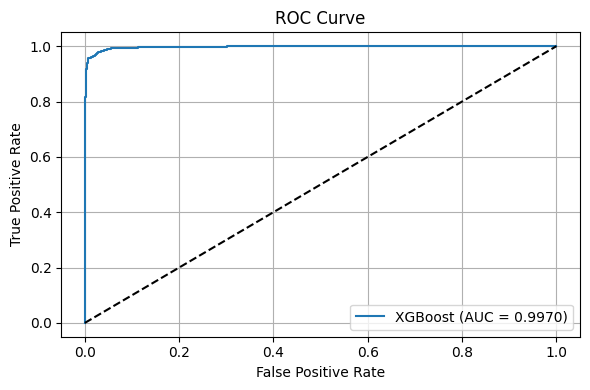

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neural_network import MLPClassifier

# === Load Reduced Feature Set and Labels ===
FEATURE_DIR = '/mnt/d/BR35H/preprocess/augmented/concatenated'  # Update if needed
reduced_features = np.load(f"{FEATURE_DIR}/kpcl_features.npy")  # Use KPCL not PPCA
labels_array = np.load(f"{FEATURE_DIR}/labels.npy")

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    reduced_features, labels_array, test_size=0.2, random_state=42, stratify=labels_array
)

# === Train MLP ===
mlp = MLPClassifier(hidden_layer_sizes=(256, 128), activation='relu', solver='adam',
                    max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

# === Predict ===
y_pred = mlp.predict(X_test)
y_prob = mlp.predict_proba(X_test)[:, 1]

# === Metrics ===
acc = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
auc_score = roc_auc_score(y_test, y_prob)

# === Print metrics ===
print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ Sensitivity (Recall): {sensitivity:.4f}")
print(f"✅ Specificity: {specificity:.4f}")
print(f"✅ AUC: {auc_score:.4f}")

# === ROC Curve ===
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'MLP (AUC = {auc_score:.4f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
import os
import cv2
import numpy as np
import pandas as pd
import pywt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

IMG_SIZE = 224
INPUT_DIR = 'D:/BR35H/preprocess/augmented'  # yes/no folders
OUTPUT_DIR = 'D:/BR35H/preprocess/augmented/dwt'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Initialize ResNet with GAP for 1024-dim features
base_model = ResNet(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
gap_output = GlobalAveragePooling2D()(base_model.output)
mobilenet_model = Model(inputs=base_model.input, outputs=gap_output)

def extract_dwt_flatten(image_gray):
    # Level 2 wavelet decomposition (bior3.5) using DWT instead of LWT
    coeffs1 = pywt.dwt2(image_gray, 'bior3.5')
    cA1, (cH1, cV1, cD1) = coeffs1
    coeffs2 = pywt.dwt2(cA1, 'bior3.5')
    cA2, (cH2, cV2, cD2) = coeffs2

    # Flatten and concatenate all level 2 components
    dwt_features = np.concatenate([
        cA2.flatten(), cH2.flatten(), cV2.flatten(), cD2.flatten()
    ])

    # Normalize coefficients
    if np.max(dwt_features) > 0:
        dwt_features = dwt_features / np.max(dwt_features)

    return dwt_features

def extract_resnett_features(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not read image {image_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE))
    x = np.expand_dims(img_resized, axis=0)
    x = preprocess_input(x.astype(np.float32))
    features = mobilenet_model.predict(x, verbose=0)
    return features.flatten()  # 1024 features

features_list = []
labels_list = []
filenames_list = []

for label in ['yes', 'no']:
    folder_path = os.path.join(INPUT_DIR, label)
    for fname in os.listdir(folder_path):
        if not fname.lower().endswith(('.jpg', '.png', '.jpeg')):
            continue
        img_path = os.path.join(folder_path, fname)

        img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img_gray is None:
            print(f"Warning: Could not read {img_path}")
            continue
        img_gray_resized = cv2.resize(img_gray, (IMG_SIZE, IMG_SIZE))

        # Extract DWT features
        dwt_feat = extract_dwt_flatten(img_gray_resized)

        # Extract ResNet features (1024)
        try:
            mob_feat = extract_mobilenet_features(img_path)
        except Exception as e:
            print(f"Error ResNet for {fname}: {e}")
            continue

        # Concatenate DWT and ResNet features
        fused_feat = np.concatenate([dwt_feat, mob_feat])

        features_list.append(fused_feat)
        labels_list.append(1 if label == 'yes' else 0)
        filenames_list.append(fname)

        print(f"Processed {label}/{fname} - Feature size: {fused_feat.shape[0]}")

features_array = np.array(features_list)
labels_array = np.array(labels_list)

np.save(os.path.join(OUTPUT_DIR, "fused_features.npy"), features_array)
np.save(os.path.join(OUTPUT_DIR, "labels.npy"), labels_array)
pd.DataFrame({'filename': filenames_list, 'label': labels_array}).to_csv(
    os.path.join(OUTPUT_DIR, "labels.csv"), index=False
)

print("Saved fused features and labels.")


NameError: name 'ResNet' is not defined

/home/saiki/myenv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [08:03:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9733
Sensitivity (Recall): 0.9707
Specificity: 0.9760
AUC: 0.9970


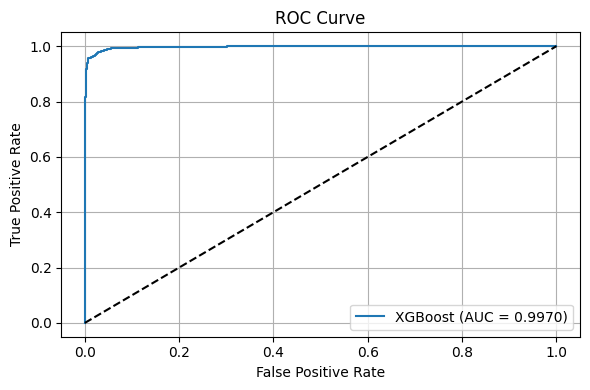

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import xgboost as xgb

# === Load Reduced Feature Set and Labels ===
FEATURE_DIR = '/mnt/d/BR35H/preprocess/augmented/concatenated'   # Update path if needed
reduced_features = np.load(f"{FEATURE_DIR}/ppca_features.npy")
labels_array = np.load(f"{FEATURE_DIR}/labels.npy")

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    reduced_features, labels_array, test_size=0.2, random_state=42, stratify=labels_array
)

# === Train XGBoost ===
clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf.fit(X_train, y_train)

# === Predict ===
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# === Metrics ===
acc = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
auc_score = roc_auc_score(y_test, y_prob)

# === Print metrics ===
print(f"Accuracy: {acc:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC: {auc_score:.4f}")

# === ROC Curve ===
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/home/saiki/myenv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:29:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9733
Sensitivity (Recall): 0.9707
Specificity: 0.9760
AUC: 0.9970


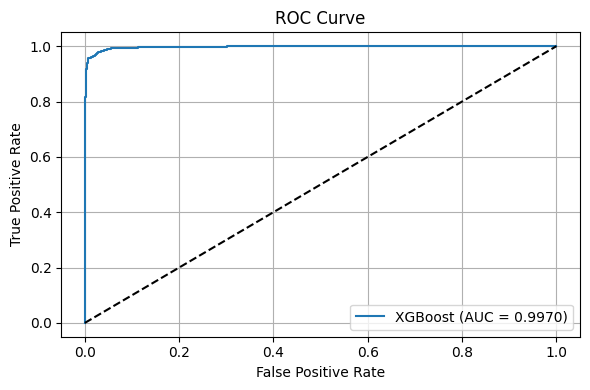

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import xgboost as xgb

# === Load Reduced Feature Set and Labels ===
FEATURE_DIR = '/mnt/d/BR35H/preprocess/augmented/concatenated'  # Update path if needed
reduced_features = np.load(f"{FEATURE_DIR}/ppca_features.npy")
labels_array = np.load(f"{FEATURE_DIR}/labels.npy")

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    reduced_features, labels_array, test_size=0.2, random_state=42, stratify=labels_array
)

# === Train XGBoost ===
clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf.fit(X_train, y_train)

# === Predict ===
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# === Metrics ===
acc = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
auc_score = roc_auc_score(y_test, y_prob)

# === Print metrics ===
print(f"Accuracy: {acc:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC: {auc_score:.4f}")

# === ROC Curve ===
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/home/saiki/myenv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:31:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9550
Sensitivity (Recall): 0.9567
Specificity: 0.9533
AUC: 0.9887


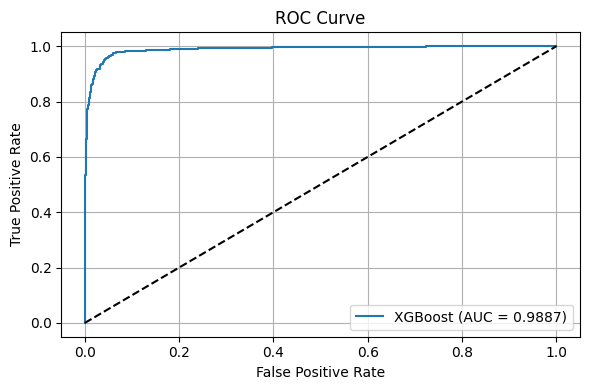

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import xgboost as xgb

# === Load Reduced Feature Set and Labels ===
FEATURE_DIR = '/mnt/d/BR35H/preprocess/augmented/'  # Update path if needed
reduced_features = np.load(f"{FEATURE_DIR}lwt_statistical_features.npy")
labels_array = np.load(f"{FEATURE_DIR}/lwt_labels.npy")

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    reduced_features, labels_array, test_size=0.2, random_state=42, stratify=labels_array
)

# === Train XGBoost ===
clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf.fit(X_train, y_train)

# === Predict ===
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# === Metrics ===
acc = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
auc_score = roc_auc_score(y_test, y_prob)

# === Print metrics ===
print(f"Accuracy: {acc:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC: {auc_score:.4f}")

# === ROC Curve ===
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/home/saiki/myenv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:34:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9733
Sensitivity (Recall): 0.9707
Specificity: 0.9760
AUC: 0.9970


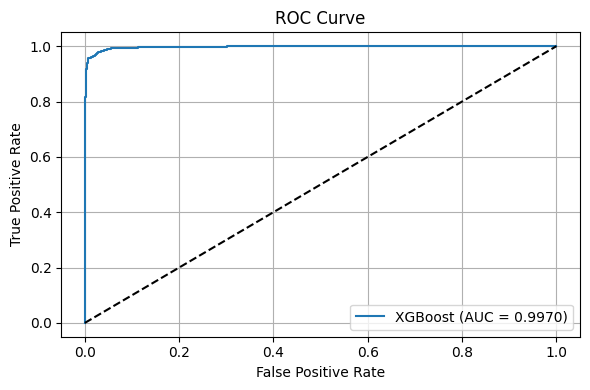

In [14]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import xgboost as xgb

# === Load Reduced Feature Set and Labels ===
FEATURE_DIR = '/mnt/d/BR35H/preprocess/augmented/concatenated/'  # Update path if needed
reduced_features = np.load(f"{FEATURE_DIR}ppca_features.npy")
labels_array = np.load(f"{FEATURE_DIR}/labels.npy")

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    reduced_features, labels_array, test_size=0.2, random_state=42, stratify=labels_array
)

# === Train XGBoost ===
clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf.fit(X_train, y_train)

# === Predict ===
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# === Metrics ===
acc = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
auc_score = roc_auc_score(y_test, y_prob)

# === Print metrics ===
print(f"Accuracy: {acc:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC: {auc_score:.4f}")

# === ROC Curve ===
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Accuracy: 0.9813
Sensitivity (Recall): 0.9793
Specificity: 0.9833
AUC: 0.9979


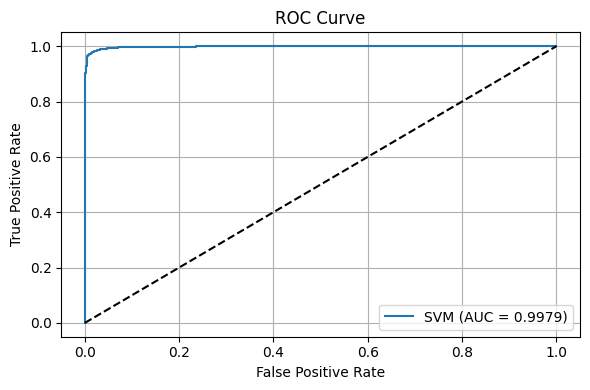

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# === Load Reduced Feature Set and Labels ===
FEATURE_DIR = '/mnt/d/BR35H/preprocess/augmented/concatenated/'  # Update path if needed
reduced_features = np.load(f"{FEATURE_DIR}ppca_features.npy")
labels_array = np.load(f"{FEATURE_DIR}/labels.npy")

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    reduced_features, labels_array, test_size=0.2, random_state=42, stratify=labels_array
)

# === Train SVM ===
clf = SVC(kernel='rbf', probability=True, random_state=42)
clf.fit(X_train, y_train)

# === Predict ===
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# === Metrics ===
acc = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
auc_score = roc_auc_score(y_test, y_prob)

# === Print metrics ===
print(f"Accuracy: {acc:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC: {auc_score:.4f}")

# === ROC Curve ===
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'SVM (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Accuracy: 0.9843
Sensitivity (Recall): 0.9820
Specificity: 0.9867
AUC: 0.9989


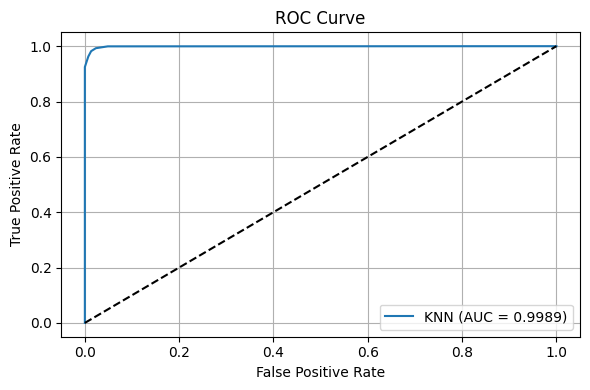

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# === Load Reduced Feature Set and Labels ===
FEATURE_DIR = '/mnt/d/BR35H/preprocess/augmented/concatenated/'  # Update path if needed
reduced_features = np.load(f"{FEATURE_DIR}ppca_features.npy")
labels_array = np.load(f"{FEATURE_DIR}/labels.npy")

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    reduced_features, labels_array, test_size=0.2, random_state=42, stratify=labels_array
)

# === Train KNN ===
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')  # You can tune n_neighbors
clf.fit(X_train, y_train)

# === Predict ===
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Probability of class 1

# === Metrics ===
acc = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
auc_score = roc_auc_score(y_test, y_prob)

# === Print metrics ===
print(f"Accuracy: {acc:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC: {auc_score:.4f}")

# === ROC Curve ===
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Accuracy: 0.9843
Sensitivity (Recall): 0.9820
Specificity: 0.9867
AUC: 0.9989


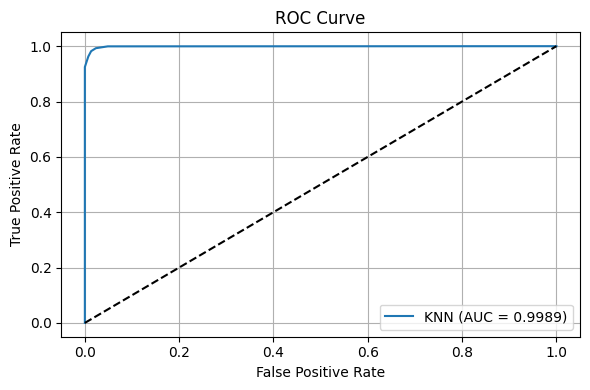

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# === Load Reduced Feature Set and Labels ===
FEATURE_DIR = '/mnt/d/BR35H/preprocess/augmented/concatenated/'  # Update path if needed
reduced_features = np.load(f"{FEATURE_DIR}ppca_features.npy")
labels_array = np.load(f"{FEATURE_DIR}/labels.npy")

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    reduced_features, labels_array, test_size=0.2, random_state=42, stratify=labels_array
)

# === Train KNN ===
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')  # You can tune n_neighbors
clf.fit(X_train, y_train)

# === Predict ===
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Probability of class 1

# === Metrics ===
acc = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
auc_score = roc_auc_score(y_test, y_prob)

# === Print metrics ===
print(f"Accuracy: {acc:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC: {auc_score:.4f}")

# === ROC Curve ===
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Accuracy: 0.9843
Sensitivity (Recall): 0.9820
Specificity: 0.9867
AUC: 0.9989


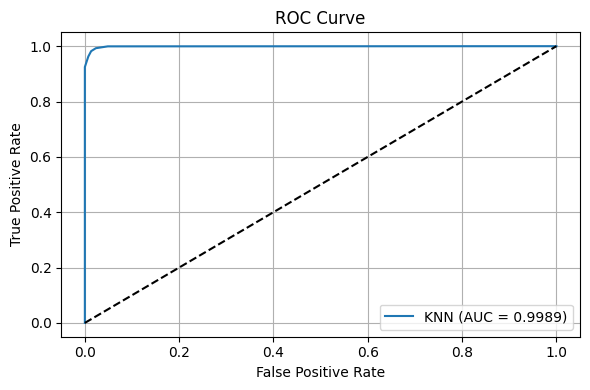

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# === Load Reduced Feature Set and Labels ===
FEATURE_DIR = '/mnt/d/BR35H/preprocess/augmented/concatenated/'  # Update path if needed
reduced_features = np.load(f"{FEATURE_DIR}ppca_features.npy")
labels_array = np.load(f"{FEATURE_DIR}/labels.npy")

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    reduced_features, labels_array, test_size=0.2, random_state=42, stratify=labels_array
)

# === Train KNN ===
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')  # You can tune n_neighbors
clf.fit(X_train, y_train)

# === Predict ===
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Probability of class 1

# === Metrics ===
acc = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
auc_score = roc_auc_score(y_test, y_prob)

# === Print metrics ===
print(f"Accuracy: {acc:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC: {auc_score:.4f}")

# === ROC Curve ===
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/home/saiki/myenv/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: [ 5 11 17 23 29 35 41]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/home/saiki/myenv/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: [ 5 11 17 23 29 35 41]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Accuracy: 0.8727
Sensitivity (Recall): 0.8593
Specificity: 0.8860
AUC: 0.9536


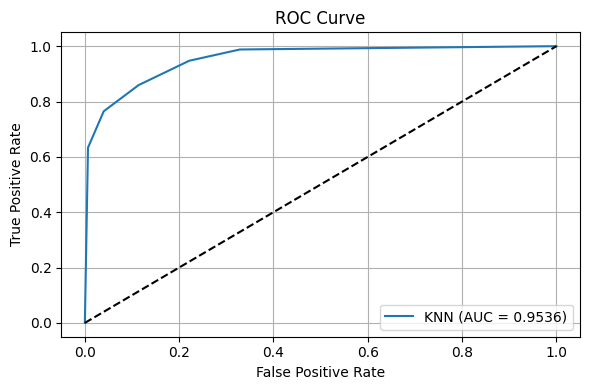

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# === Load Reduced Feature Set and Labels ===
FEATURE_DIR = '/mnt/d/BR35H/preprocess/augmented/'  # Update path if needed
reduced_features = np.load(f"{FEATURE_DIR}lwt_statistical_features.npy")
labels_array = np.load(f"{FEATURE_DIR}/lwt_labels.npy")

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    reduced_features, labels_array, test_size=0.2, random_state=42, stratify=labels_array
)

# === Handle NaN values ===
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# === Train KNN ===
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

# === Predict ===
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Probability of class 1

# === Metrics ===
acc = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
auc_score = roc_auc_score(y_test, y_prob)

# === Print metrics ===
print(f"Accuracy: {acc:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC: {auc_score:.4f}")

# === ROC Curve ===
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Accuracy: 0.9843
Sensitivity (Recall): 0.9820
Specificity: 0.9867
AUC: 0.9989


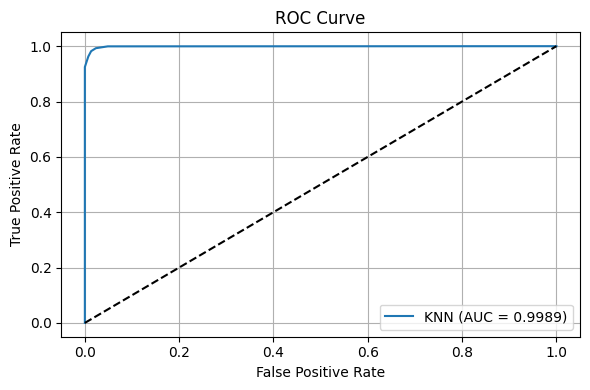

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# === Load Reduced Feature Set and Labels ===
FEATURE_DIR = '/mnt/d/BR35H/preprocess/augmented/concatenated/'  # Update path if needed
reduced_features = np.load(f"{FEATURE_DIR}ppca_features.npy")
labels_array = np.load(f"{FEATURE_DIR}/labels.npy")

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    reduced_features, labels_array, test_size=0.2, random_state=42, stratify=labels_array
)

# === Handle NaN values ===
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# === Train KNN ===
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

# === Predict ===
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Probability of class 1

# === Metrics ===
acc = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
auc_score = roc_auc_score(y_test, y_prob)

# === Print metrics ===
print(f"Accuracy: {acc:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC: {auc_score:.4f}")

# === ROC Curve ===
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
